In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

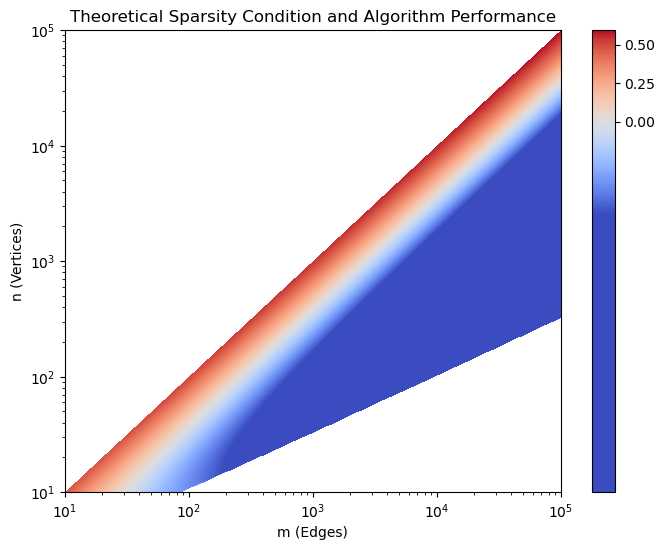

In [54]:
def func1(m, n):
    return m + n * np.log(n)

def func2(m, n):
    return m * np.log(n)**(2/3)

m = np.logspace(1, 5, 500)
n = np.logspace(1, 5, 500)
M, N = np.meshgrid(m, n)
# Calculate the difference between the two functions.
# A positive value means func1 is larger (slower), negative means func2 is larger.
Z = (func1(M, N) - func2(M, N)) / func1(M, N)
mask_fully_connected = M > N * (N - 1)
mask_above_45 = N > M
combined_mask = mask_fully_connected | mask_above_45
Z[combined_mask] = 0
# Use a symmetric logarithmic scale for the color map to handle the wide range of differences
# and to keep the boundary at zero visually centered.
# norm = plt.cm.colors.SymLogNorm(linthresh=1e4, vmin=Z.min(), vmax=Z.max())
# norm = plt.Normalize(vmin=Z.min(), vmax=Z.max())

plt.figure(figsize=(8, 6))

# Plot the difference using a diverging colormap
contour = plt.contourf(M, N, Z, levels=500, cmap='coolwarm', vmin = -0.6, vmax = 0.6)
plt.colorbar(ticks = [0,0.25,0.5,0.75])

# Define and overlay the fully connected boundary region
mask_fully_connected = M > N * (N - 1)
mask_above_45 = N > M
combined_mask = mask_fully_connected | mask_above_45
plt.contourf(M, N, combined_mask, levels=[0.5, 1.5], colors=['white'], alpha=0.99999)


plt.xscale('log')
plt.yscale('log')
plt.xlabel('m (Edges)')
plt.ylabel('n (Vertices)')
plt.title('Theoretical Sparsity Condition and Algorithm Performance')

plt.savefig("colormap_contour.png")
plt.show()
